In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

## 1.Seaborn
- matplotlib을 기반으로 만들어진 시각화 라이브러리
- 디자인적으로 좀 더 세련된 플롯 그리기를 지원
- matplotlib과 사용 방식이 유사하므로, 쉽고 빠르게 습득할 수 있음
- http://stanford.edu/~mwaskom/software/seaborn/index.html
- seaborn gallery : http://seaborn.pydata.org/examples/index.html


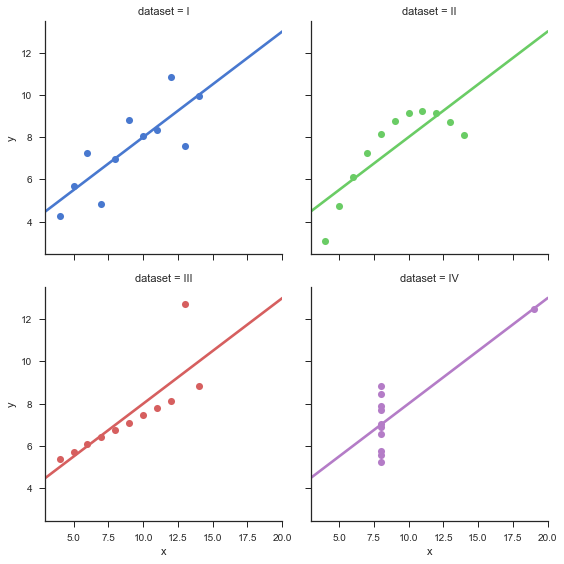

In [18]:
#Anscombe’s quartet

sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

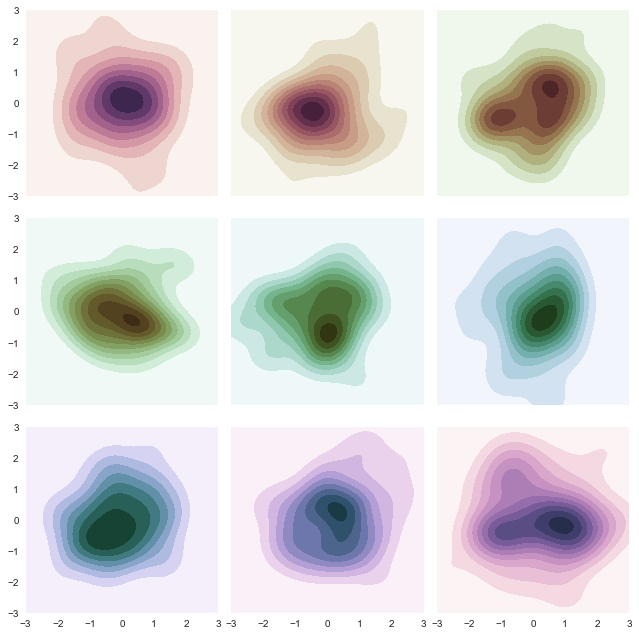

In [17]:
#Different cubehelix palettes

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

C:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


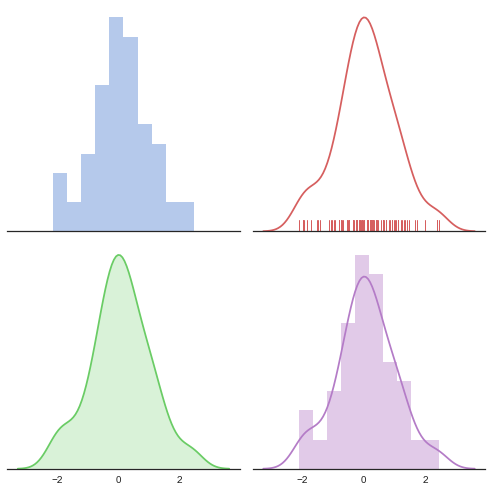

In [16]:
# Distribution plot options

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

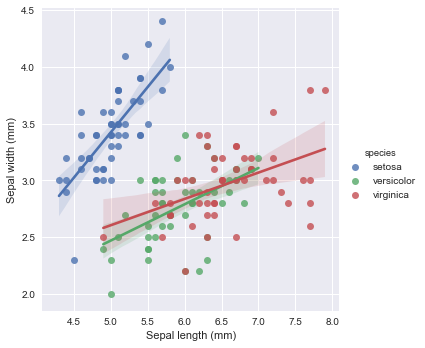

In [15]:
# Multiple linear regression

sns.set()

# Load the example tips dataset
iris = sns.load_dataset("iris")

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

C:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


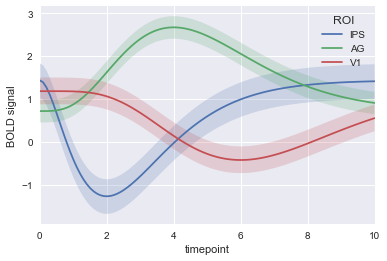

In [14]:
# Timeseries from DataFrame

sns.set(style="darkgrid")

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=gammas, time="timepoint", unit="subject",
           condition="ROI", value="BOLD signal")

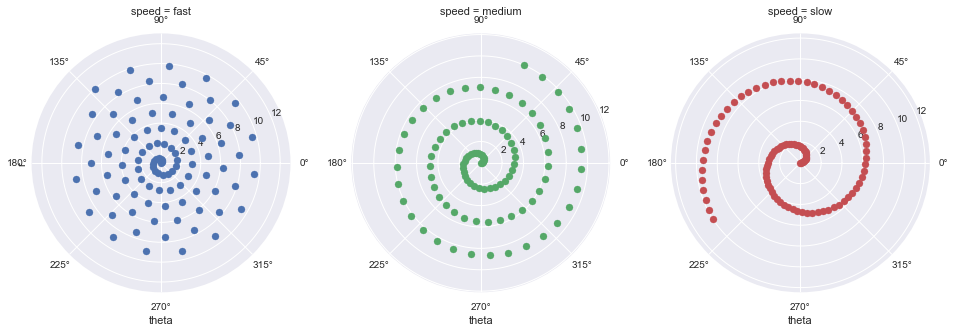

In [13]:
# FacetGrid with custom projection

sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "theta", "r")

## 2. Bokeh
- 웹 브라우저 상에서의 시각화에 효과적인 python 인터렉티브 시각화 라이브러리
- 플롯을 html 파일로 export하여, 이를 웹 브라우저를 통해 확인할 수 있음
- matplotlib과 사용 방식이 유사하며, IPhython Notebook과 원활히 호환됨
- http://bokeh.pydata.org/en/latest/index.html

In [2]:
# Twin axes
from numpy import pi, arange, sin, linspace

from bokeh.plotting import output_file, figure, show
from bokeh.models import LinearAxis, Range1d

x = arange(-2*pi, 2*pi, 0.1)
y = sin(x)
y2 = linspace(0, 100, len(y))

output_file("twin_axis.html")

p = figure(x_range=(-6.5, 6.5), y_range=(-1.1, 1.1))

p.circle(x, y, color="red")

p.extra_y_ranges = {"foo": Range1d(start=0, end=100)}
p.circle(x, y2, color="blue", y_range_name="foo")
p.add_layout(LinearAxis(y_range_name="foo"), 'left')

show(p)

In [3]:
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

output_file("brushing.html")

x = list(range(-20, 21))
y0 = [abs(xx) for xx in x]
y1 = [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, plot_width=300, plot_height=300, title=None)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, plot_width=300, plot_height=300, title=None)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

In [42]:
import numpy as np

from bokeh.models import BoxSelectTool, BoxZoomTool, LassoSelectTool
from bokeh.plotting import figure, output_file, show

output_file("styling_tool_overlays.html")

x = np.random.random(size=200)
y = np.random.random(size=200)

# Basic plot setup
plot = figure(plot_width=400, plot_height=400, title='Select and Zoom',
              tools="box_select,box_zoom,lasso_select,reset")

plot.circle(x, y, size=5)

select_overlay = plot.select_one(BoxSelectTool).overlay

select_overlay.fill_color = "firebrick"
select_overlay.line_color = None

zoom_overlay = plot.select_one(BoxZoomTool).overlay

zoom_overlay.line_color = "olive"
zoom_overlay.line_width = 8
zoom_overlay.line_dash = "solid"
zoom_overlay.fill_color = None

plot.select_one(LassoSelectTool).overlay.line_dash = [10, 10]

show(plot)

In [4]:
# categorycal heatmal

from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file

factors = ["a", "b", "c", "d", "e", "f", "g", "h"]
x =  [50, 40, 65, 10, 25, 37, 80, 60]

dot = figure(title="Categorical Dot Plot", tools="", toolbar_location=None,
            y_range=factors, x_range=[0,100])

dot.segment(0, factors, x, factors, line_width=2, line_color="green", )
dot.circle(x, factors, size=15, fill_color="orange", line_color="green", line_width=3, )

factors = ["foo 123", "bar:0.2", "baz-10"]
x = ["foo 123", "foo 123", "foo 123", "bar:0.2", "bar:0.2", "bar:0.2", "baz-10",  "baz-10",  "baz-10"]
y = ["foo 123", "bar:0.2", "baz-10",  "foo 123", "bar:0.2", "baz-10",  "foo 123", "bar:0.2", "baz-10"]
colors = [
    "#0B486B", "#79BD9A", "#CFF09E",
    "#79BD9A", "#0B486B", "#79BD9A",
    "#CFF09E", "#79BD9A", "#0B486B"
]

hm = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None,
            x_range=factors, y_range=factors)

hm.rect(x, y, color=colors, width=1, height=1)

output_file("categorical.html", title="categorical.py example")

show(row(hm, dot, sizing_mode="scale_width"))  # open a browser

In [47]:
# LORENZ

from scipy.integrate import odeint

from bokeh.plotting import figure, show, output_file

sigma = 10
rho = 28
beta = 8.0/3
theta = 3 * np.pi / 4

def lorenz(xyz, t):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = x * rho - x * z - y
    z_dot = x * y - beta* z
    return [x_dot, y_dot, z_dot]

initial = (-10, -7, 35)
t = np.arange(0, 100, 0.006)

solution = odeint(lorenz, initial, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]
xprime = np.cos(theta) * x - np.sin(theta) * y

colors = ["#C6DBEF", "#9ECAE1", "#6BAED6", "#4292C6", "#2171B5", "#08519C", "#08306B",]

p = figure(title="lorenz example")

p.multi_line(np.array_split(xprime, 7), np.array_split(z, 7),
             line_color=colors, line_alpha=0.8, line_width=1.5)

output_file("lorenz.html", title="lorenz.py example")

show(p)  # open a browser

In [5]:
# BURTIN
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO

from bokeh.plotting import figure, show, output_file

antibiotics = """
bacteria,                        penicillin, streptomycin, neomycin, gram
Mycobacterium tuberculosis,      800,        5,            2,        negative
Salmonella schottmuelleri,       10,         0.8,          0.09,     negative
Proteus vulgaris,                3,          0.1,          0.1,      negative
Klebsiella pneumoniae,           850,        1.2,          1,        negative
Brucella abortus,                1,          2,            0.02,     negative
Pseudomonas aeruginosa,          850,        2,            0.4,      negative
Escherichia coli,                100,        0.4,          0.1,      negative
Salmonella (Eberthella) typhosa, 1,          0.4,          0.008,    negative
Aerobacter aerogenes,            870,        1,            1.6,      negative
Brucella antracis,               0.001,      0.01,         0.007,    positive
Streptococcus fecalis,           1,          1,            0.1,      positive
Staphylococcus aureus,           0.03,       0.03,         0.001,    positive
Staphylococcus albus,            0.007,      0.1,          0.001,    positive
Streptococcus hemolyticus,       0.001,      14,           10,       positive
Streptococcus viridans,          0.005,      10,           40,       positive
Diplococcus pneumoniae,          0.005,      11,           10,       positive
"""

drug_color = OrderedDict([
    ("Penicillin",   "#0d3362"),
    ("Streptomycin", "#c64737"),
    ("Neomycin",     "black"  ),
])

gram_color = {
    "positive" : "#aeaeb8",
    "negative" : "#e69584",
}

df = pd.read_csv(StringIO(antibiotics),
                 skiprows=1,
                 skipinitialspace=True,
                 engine='python')

width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = sqrt(log(.001 * 1E4))
maxr = sqrt(log(1000 * 1E4))
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

def rad(mic):
    return a * np.sqrt(np.log(mic * 1E4)) + b

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-420, 420), y_range=(-420, 420),
    min_border=0, outline_line_color="black",
    background_fill_color="#f0e1d2")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# annular wedges
angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle
colors = [gram_color[gram] for gram in df.gram]
p.annular_wedge(
    0, 0, inner_radius, outer_radius, -big_angle+angles, angles, color=colors,
)

# small wedges
p.annular_wedge(0, 0, inner_radius, rad(df.penicillin),
                -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
                color=drug_color['Penicillin'])
p.annular_wedge(0, 0, inner_radius, rad(df.streptomycin),
                -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
                color=drug_color['Streptomycin'])
p.annular_wedge(0, 0, inner_radius, rad(df.neomycin),
                -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
                color=drug_color['Neomycin'])

# circular axes and lables
labels = np.power(10.0, np.arange(-3, 4))
radii = a * np.sqrt(np.log(labels * 1E4)) + b
p.circle(0, 0, radius=radii, fill_color=None, line_color="white")
p.text(0, radii[:-1], [str(r) for r in labels[:-1]],
       text_font_size="8pt", text_align="center", text_baseline="middle")

# radial axes
p.annular_wedge(0, 0, inner_radius-10, outer_radius+10,
                -big_angle+angles, -big_angle+angles, color="black")

# bacteria labels
xr = radii[0]*np.cos(np.array(-big_angle/2 + angles))
yr = radii[0]*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, df.bacteria, angle=label_angle,
       text_font_size="9pt", text_align="center", text_baseline="middle")

# OK, these hand drawn legends are pretty clunky, will be improved in future release
p.circle([-40, -40], [-370, -390], color=list(gram_color.values()), radius=5)
p.text([-30, -30], [-370, -390], text=["Gram-" + gr for gr in gram_color.keys()],
       text_font_size="7pt", text_align="left", text_baseline="middle")

p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
       color=list(drug_color.values()))
p.text([-15, -15, -15], [18, 0, -18], text=list(drug_color),
       text_font_size="9pt", text_align="left", text_baseline="middle")

output_file("burtin.html", title="burtin.py example")

show(p)


## 3. Folium
- 지리적 데이터 시각화에 특화된 라이브러리(leafle.js 기반)
- 지도 데이터 사용을 위해 선행되어야 하는 작업이 적으며, 설치 및 사용법이 아주 간단함
- https://github.com/python-visualization/folium
- sample : http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

## 4. Matplotlilb
- 다양한 시각화 플롯을 제공
- 사용이 편리함
- https://matplotlib.org/
- example : https://matplotlib.org/gallery/index.html